In [1]:
import pandas, numpy

import scipy, scipy.stats

import matplotlib, matplotlib.pyplot
matplotlib.rcParams.update({'font.size':40, 'font.family':'FreeSans', 'xtick.labelsize':40, 'ytick.labelsize':40, 'figure.figsize':(16,8)})

# 1. read file

In [2]:
raw_file = '/home/adrian/projects/vigur/results/sequencing/trimming_relevance/raw/abundance.tsv'
clean_file = '/home/adrian/projects/vigur/results/sequencing/trimming_relevance/clean/abundance.tsv'

In [3]:
raw = pandas.read_csv(raw_file, index_col=0, sep='\t')
print(raw.shape)
raw.head()

(188753, 4)


,length,eff_length,est_counts,tpm
target_id,,,,
ENST00000631435.1,12,5.36364,0.0,0.0
ENST00000434970.2,9,5.80000,0.0,0.0
ENST00000448914.1,13,6.36364,0.0,0.0
ENST00000415118.1,8,4.80000,0.0,0.0
ENST00000632684.1,12,5.36364,0.0,0.0


In [4]:
clean = pandas.read_csv(clean_file, index_col=0, sep='\t')
print(clean.shape)
clean.head()

(188753, 4)


,length,eff_length,est_counts,tpm
target_id,,,,
ENST00000631435.1,12,5.36364,0.0,0.0
ENST00000434970.2,9,5.80000,0.0,0.0
ENST00000448914.1,13,6.36364,0.0,0.0
ENST00000415118.1,8,4.80000,0.0,0.0
ENST00000632684.1,12,5.36364,0.0,0.0


# 2. analysis

## 2.1. select data

In [5]:
top_rank = 10000

In [6]:
clean[clean['tpm'].rank(ascending=False) <= top_rank]

,length,eff_length,est_counts,tpm
target_id,,,,
ENST00000419783.3,899,781.2890,2.548900e+04,396.8010
ENST00000361390.2,956,625.0230,2.329710e+05,4533.5400
ENST00000361453.3,1042,653.2730,1.335830e+05,2487.0700
ENST00000361624.2,1542,1158.6300,1.623050e+06,17038.0000
ENST00000361739.1,684,374.0240,2.878840e+05,9361.5900
...,...,...,...,...
ENST00000416931.1,372,144.4240,2.820700e+02,23.7548
ENST00000514057.1,681,346.4820,8.761310e+03,307.5530
ENST00000624041.1,768,371.2420,4.531100e+02,14.8449


In [7]:
top_clean_genes = clean[clean['tpm'].rank(ascending=False) <= top_rank].index.to_list()
top_raw_genes = raw[raw['tpm'].rank(ascending=False) <= top_rank].index.to_list()

In [8]:
#top_clean_genes

In [9]:
#top_raw_genes

In [10]:
union = list(set(top_clean_genes) | set(top_raw_genes))
print(len(union))

10063


### retrieve values for comparison

In [11]:
min_value = 9999
c = []; r = []
for element in union:
    x = clean.loc[element, 'tpm']
    y = raw.loc[element, 'tpm']
    #print(element, x, y)
    
    c.append(x); r.append(y)
    
    if x < min_value:
        min_value = x
    if y < min_value:
        min_value = y

print(min_value)

3.2178


## 2.2. plot figures 

### lin scale

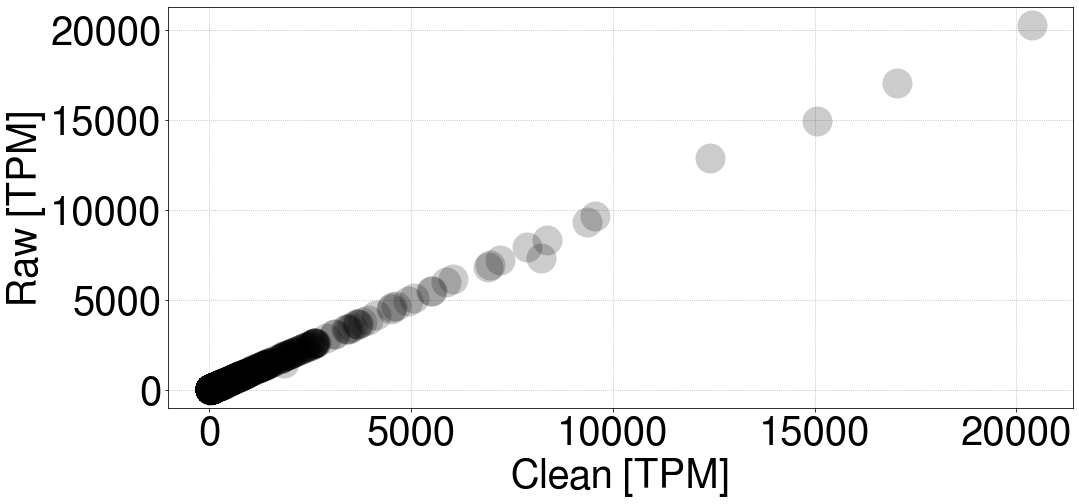

In [12]:
matplotlib.pyplot.plot(c, r, 'ok', alpha=1/5, ms=30, mew=0)
matplotlib.pyplot.xlabel('Clean [TPM]')
matplotlib.pyplot.ylabel('Raw [TPM]')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

In [13]:
rho, pval = scipy.stats.pearsonr(c, r)
print(rho, pval)
rho, pval = scipy.stats.spearmanr(c, r)
print(rho, pval)

0.9997280755034734 0.0
0.9977428049515517 0.0


### log scale

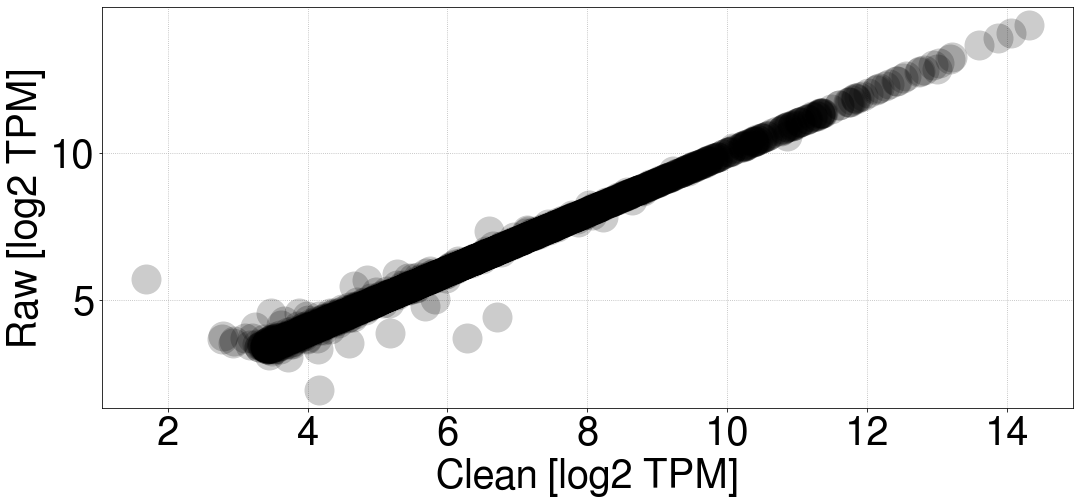

In [14]:
matplotlib.pyplot.plot(numpy.log2(c), numpy.log2(r), 'ok', alpha=1/5, ms=30, mew=0)
matplotlib.pyplot.xlabel('Clean [log2 TPM]')
matplotlib.pyplot.ylabel('Raw [log2 TPM]')
matplotlib.pyplot.grid(ls=':')
matplotlib.pyplot.tight_layout()

In [15]:
rho, pval = scipy.stats.pearsonr(numpy.log2(c), numpy.log2(r))
print(rho, pval)
rho, pval = scipy.stats.spearmanr(numpy.log2(c), numpy.log2(r))
print(rho, pval)

0.9986647677667071 0.0
0.9977428049515517 0.0
